# Atividade 5

In [1]:
import math

import numpy as np
from IPython.display import display
from numba import njit
# from skimage.morphology import convex_hull_image

from src.utils import *
from src.transform import binarizar
from src.filter import suavizar_box

In [2]:
PATH = "data/morfologia"

## Operação Lógica

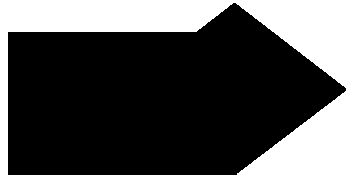

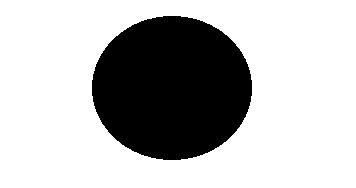

In [3]:
img1a, im_array1a = open_gray(f"{PATH}/Image_(1a).png")
img1b, im_array1b = open_gray(f"{PATH}/Image_(1b).png")
display(img1a)
display(img1b)
im_array1a_bin = (im_array1a / 255).astype(np.uint8)
im_array1b_bin = (im_array1b / 255).astype(np.uint8)

### OR

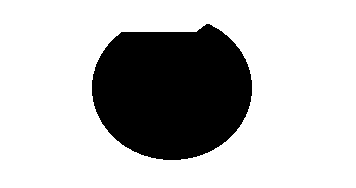

In [4]:
im_or = np.zeros(im_array1a.shape, dtype=np.uint8)

for y in range(im_array1a.shape[0]):
    for x in range(im_array1a.shape[1]):
        if im_array1a_bin[y][x] == 1 or im_array1b_bin[y][x] == 1:
            im_or[y][x] = 1

Image.fromarray(im_or*255)

### AND

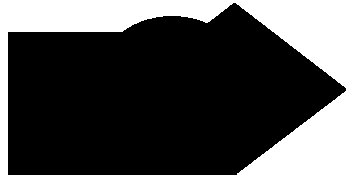

In [5]:
im_and = np.zeros(im_array1b_bin.shape, dtype=np.uint8)

for y in range(im_array1a.shape[0]):
    for x in range(im_array1a.shape[1]):
        if im_array1a_bin[y][x] == 1 and im_array1b_bin[y][x] == 1:
            im_and[y][x] = 1

Image.fromarray(im_and*255)

### XOR

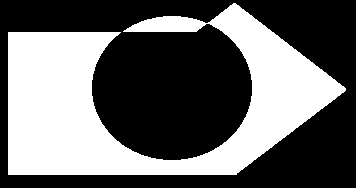

In [6]:
im_xor = np.zeros(im_array1a.shape, dtype=np.uint8)

for y in range(im_array1a.shape[0]):
    for x in range(im_array1a.shape[1]):
        if (im_array1a_bin[y][x] == 1 and im_array1b_bin[y][x] == 0) or (
            im_array1a_bin[y][x] == 0 and im_array1b_bin[y][x] == 1
        ):
            im_xor[y][x] = 1

Image.fromarray(im_xor*255)

### XAND

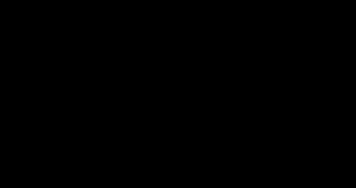

In [7]:
im_xand = np.zeros(im_array1a.shape, dtype=np.uint8)

for y in range(im_array1a.shape[0]):
    for x in range(im_array1a.shape[1]):
        if (im_array1a_bin[y][x] == 1 and im_array1b_bin[y][x] == 0) and (
            im_array1a_bin[y][x] == 0 and im_array1b_bin[y][x] == 1
        ):
            im_xand[y][x] = 1

Image.fromarray(im_xand*255)

## Operações Morfológicas

### Erosão

In [8]:
@njit
def erosao(im_bin: np.ndarray, kernel_size: tuple[int, int]) -> np.ndarray:
    im_erode = np.zeros(im_bin.shape)
    kernel_area = kernel_size[0] * kernel_size[1]
    h, w = im_bin.shape[:2]
    wy = math.floor(kernel_size[0] / 2)
    wx = math.floor(kernel_size[1] / 2)
    for y in range(h):
        for x in range(w):
            if im_bin[y][x] == 1:
                tmp = 0
                for i in range(-wy, wy + 1):
                    vy = y + i
                    for j in range(-wx, wx + 1):
                        vx = x + j
                        if 0 <= vy < h and 0 <= vx < w:
                            tmp += im_bin[vy][vx]
                # ** Se tmp for igual area do kernel entao
                # ** o kernel e um membro da vizinhança.
                if tmp == kernel_area:
                    im_erode[y][x] = 1
    return im_erode.astype(np.uint8)


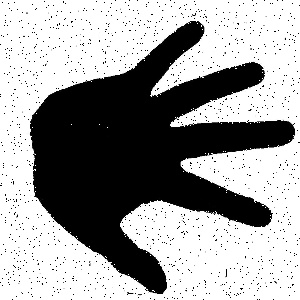

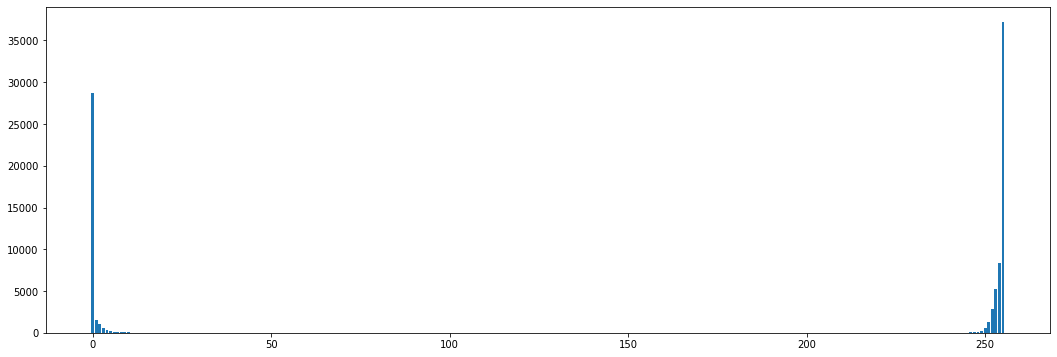

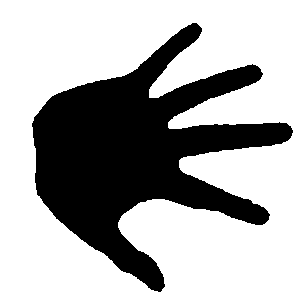

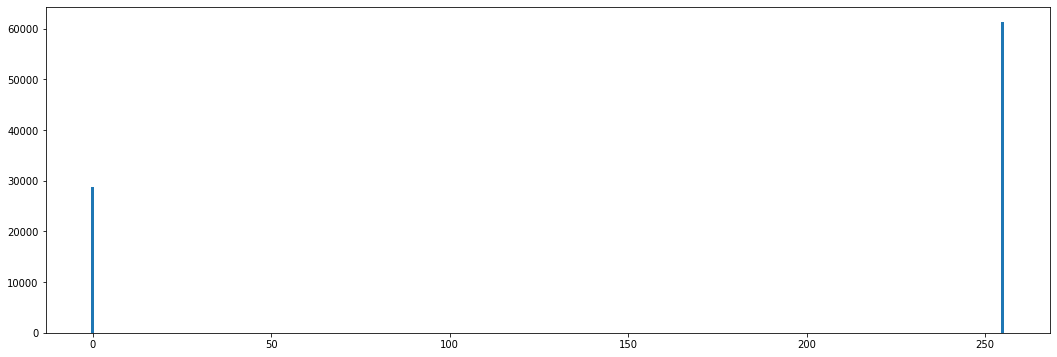

In [9]:
img2a, im_array2a = open_gray(f"{PATH}/Image_(2a).jpg")
display(img2a)

plot_histogram(im_array2a)

im_array2a_clean = suavizar_box(im_array2a, (3, 3))
# plot_histogram(im_array2a_clean)

im_array2a_bin = binarizar(im_array2a_clean, 140)
# Image.fromarray(im_array2a_bin*255)
# im_array2a
im_array2a_erode = erosao(im_array2a_bin, (5, 5))
# # im_erode
display(Image.fromarray((im_array2a_erode ^ 1) * 255))
plot_histogram((im_array2a_erode ^ 1) * 255)


## Dilatação

In [10]:
@njit
def dilatacao(im_bin: np.ndarray, kernel_size: tuple[int, int]) -> np.ndarray:
    im_dilate = np.zeros(im_bin.shape)
    h, w = im_bin.shape[:2]
    wy = math.floor(kernel_size[0] / 2)
    wx = math.floor(kernel_size[1] / 2)
    for y in range(h):
        for x in range(w):
            if im_bin[y][x] == 1:
                for i in range(-wy, wy + 1):
                    vy = y + i
                    for j in range(-wx, wx + 1):
                        vx = x + j
                        if 0 <= vy < h and 0 <= vx < w:
                            im_dilate[vy][vx] = 1
    return im_dilate.astype(np.uint8)


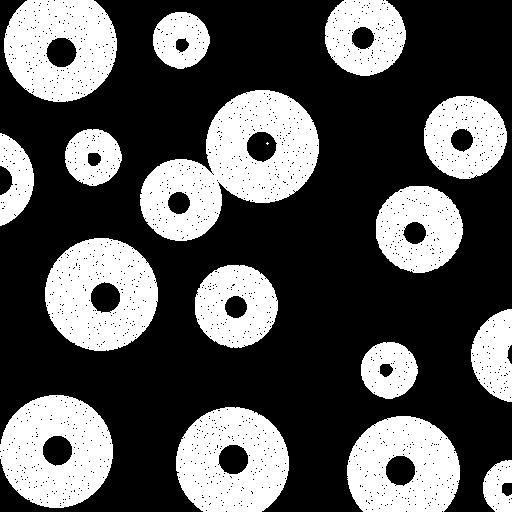

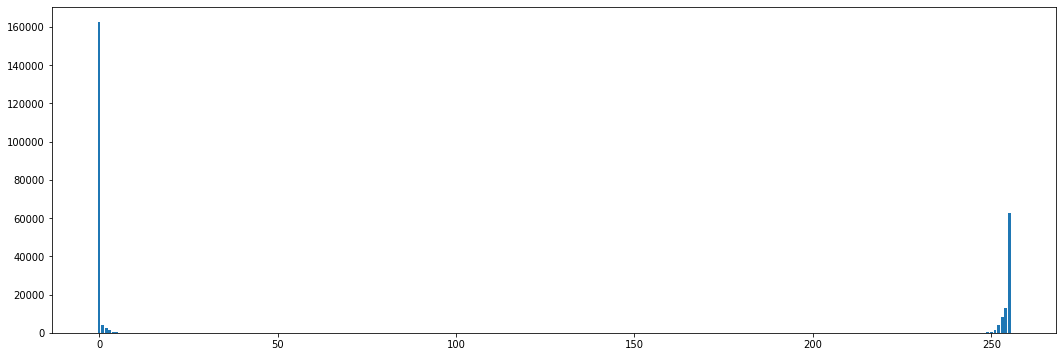

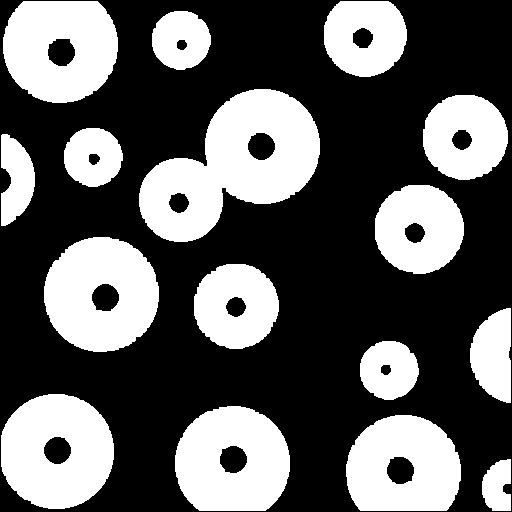

In [11]:
img3a, im_array3a = open_gray(f"{PATH}/Image_(3a).jpg")
display(img3a)

plot_histogram(im_array3a)

im_array3a_bin = binarizar(im_array3a, 200, invert=True)
# Image.fromarray(im_array3a_bin*255)
im_array3a_clean = erosao(im_array3a_bin, (3, 3))

im_array3a_dilate = dilatacao(im_array3a_clean, (7, 7))
# im_array3a_dilate = dilatacao(im_array3a_dilate, (3, 3))
im_array3a_dilate = erosao(im_array3a_dilate, (3, 3))
# im_array3a_hull = convex_hull_image(im_array3a_dilate * 255)
display(Image.fromarray(im_array3a_dilate * 255))
# display(Image.fromarray(im_array3a_hull))
# plot_histogram(im_array3a_dilate * 255)

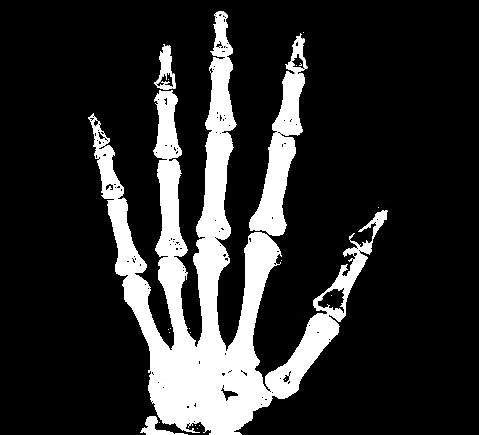

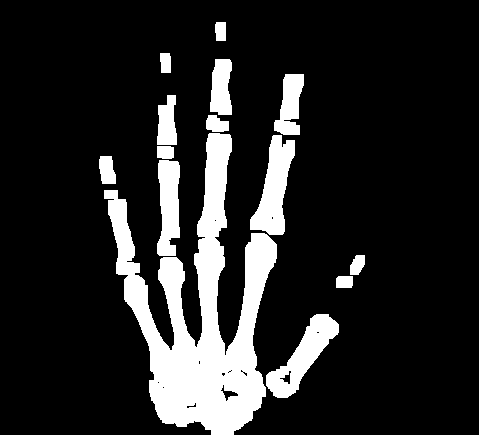

In [12]:
img4a, im_array4a = open_gray(f"{PATH}/Image_(4a).jpg")
display(img4a)

# plot_histogram(im_array4a)

# im_array4a_clean = max_filter(im_array4a, (3,3))
# display(Image.fromarray(im_array4a_clean))
# plot_histogram(im_array4a_clean)

im_array4a_bin = binarizar(im_array4a, 200, invert=True)

im_array4a_proc = erosao(im_array4a_bin, (3, 3))
im_array4a_proc = erosao(im_array4a_proc, (5, 5))
im_array4a_proc = erosao(im_array4a_proc, (3, 3))
# im_array4a_erode = erosao(im_array4a_bin, (5, 5))
im_array4a_proc = dilatacao(im_array4a_proc, (9, 9))
Image.fromarray(im_array4a_proc * 255)